# UCSD MLE Boot Camp

## Unit 11.4.1 Mini-Project: Linear Regression

## David Schonberger 11/30/2021

# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.


The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also known as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [27]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

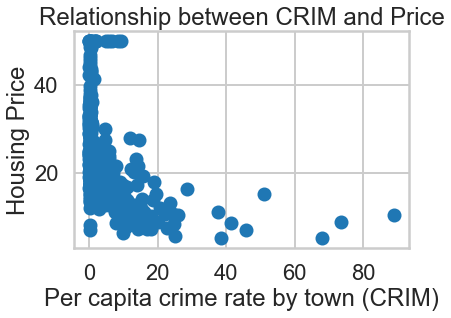

In [12]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [14]:
# your turn: describe relationship
# The relationship displays a negative trend for the lower crime rates, under 20. 
# But there is also a large swath of data with very low crime rates - nearly 0 - that cuts across
# the entire range of prices. This suggests there is a good deal of relatively
# more affordable housing in low crime areas. You don't need to pay top dollar
# to live in a safe neighborhood in Boston! Also, beyond a certain crime rate level, the prices
# stay roughly the same; the outliers with crime rates at aroung 40 or higher land in
# essentially the same low end range of prices as a large mass of housing with crime rates between
# 0 and 30.
#
# The relationship honestly looks more like a negative non-linear (exponential?) 
# than a negatively linear. That long line of housing priced 30+ with very low crime rates is what
# skews the relationship away from something more linear.

Text(0.5, 1.0, 'Relationship between RM and Price')

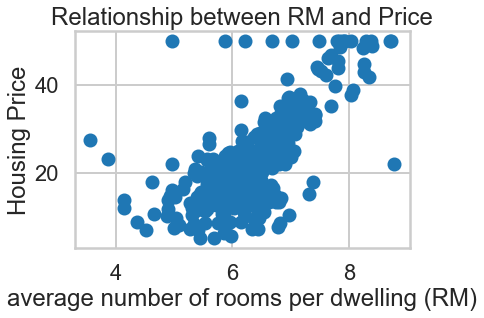

In [15]:
# your turn: scatter plot between *RM* and *PRICE*
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

In [16]:
# There is a clear, strong positive, largely linear relationship between the number of rooms
# and the price of housing in Boston. 
# Not surprising since more rooms equates to more square footage for the dwelling itself 
# and an overall large lot.
# There are a couple of outliers at the far left with relatively higher prices and very few rooms:
# maybe smllish but tony downtown condos? There are also a few high priced outliers
# with fewer rooms, perhaps bigger and ore luxrious condos in that same tony downtown
# development?

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

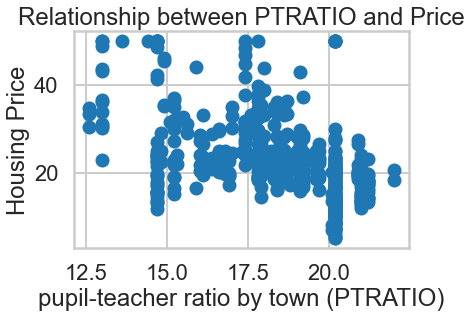

In [17]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("pupil-teacher ratio by town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

In [18]:
# The overall trend is negative: higher pupil-to-teacher ratio tends to equate
# with lower housing prices. But the relationship is not that strong. The large amorphous 
# mass of data in the middle just does not slope downward all that much. The relatively small
# subset of data in the upper left corner would probably tug the slope of a linear model upward
# and make the relationship more clearly negative. That subset is a group of outlier towns
# probably representing wealthier neighborhoods with a higher concentration of small private schools.
# There are also some outliers up top in the middle, possibly representing upper middle towns 
# with plentiful high quality public schools.

Text(0.5, 1.0, 'Relationship between ZN and Price')

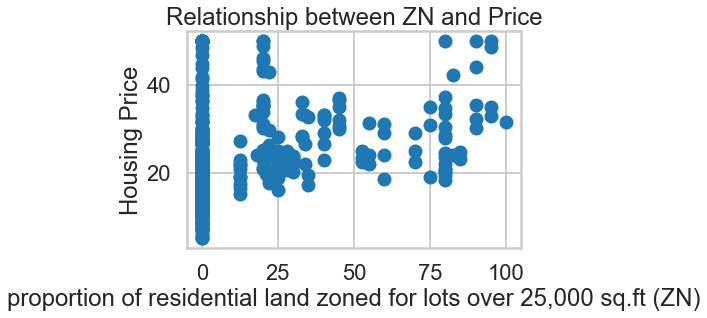

In [19]:
# scatter plot between *ZN* and *PRICE*
plt.scatter(bos.ZN, bos.PRICE)
plt.xlabel("proportion of residential land zoned for lots over 25,000 sq.ft (ZN)")
plt.ylabel("Housing Price")
plt.title("Relationship between ZN and Price")

In [21]:
# One the one hand, if you remove the long line of outliers at the far left, there is
# an overall upward trend: a larger proportion of residential land zoned for 25k+ s.f.
# tends to be associated with a higher housing price. But that seems pretty natural: if you buy 
# larger lot, you probably tend to build a bigger house on it and that costs more.
# Then there is the line of outliers. Many towns with no residential lots above 25k s.f.,
# cutting across all price levels. Indeed, the majority of the dataset may lie along this
# line. And that's not exactly a revelation. 25k+ s.f. is more than half an acre. And we're
# talking about the greater Boston area: a densely populated, cosmopolitan metropolis. Land
# is at a premium so it's not that easy to find such a large lot. Many of those big lots
# may be holdovers from a bygone era when land was cheaper and Boston was not so densely populated.
# You'd naturally expect less expensive homes to sit on smaller lots. But if you have the bread
# you can always build a nicely appointed home on a 10-15k s.f., including adding a second story
# to add square footage (and drive up the price). 

Text(0.5, 1.0, 'Relationship between AGE and Price')

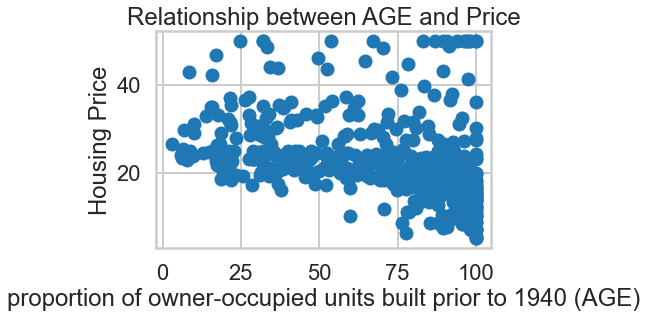

In [31]:
# scatter plot between *AGE* and *PRICE*
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("proportion of owner-occupied units built prior to 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

In [32]:
# First thing to note: the correlation here is probably not that strong, though
# there is somewhat of a downward trend. That big mass of dots in the lower right
# indicates that where a large majority (75%+) of older housing exists, the price tends to be
# at the low end of the scale. The ongoing trend in America toward building larger houses
# is a post-WWII phenomenon. and as we've seen earlier, bigger houses (more rooms)
# tend to be more expensive houses. Houses built during the Great Depression or earlier
# would tend toward smaller footprints. They are possibly also less modernized, more expensive
# to heat and cool, more worn down thus and maybe just not quite as desirable or attractive
# for many people. All those facotrs might depress their prices toward that low end. This
# could well acount for much of that big lower right mass of towns. 
#
# But then. layered on top of that are a variety towns of middle tier and upper tier priced units
# spread pretty evenly across the AGE spectrum. Those two layers likely represent towns with
# higher median income where people can generally afford to take good care of an older home 
# and preserve or even enhance it's value.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

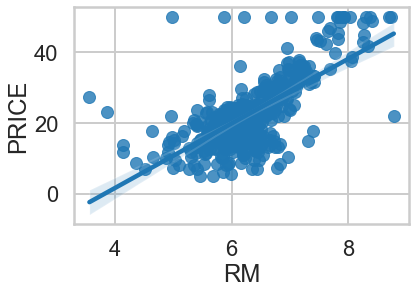

In [22]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


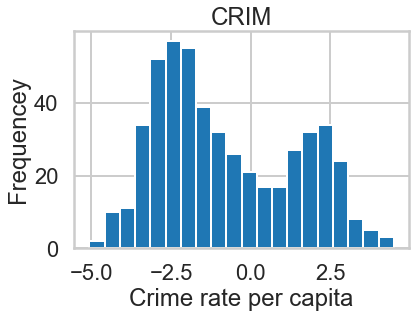

In [41]:
plt.hist(np.log(bos.CRIM), bins=20)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

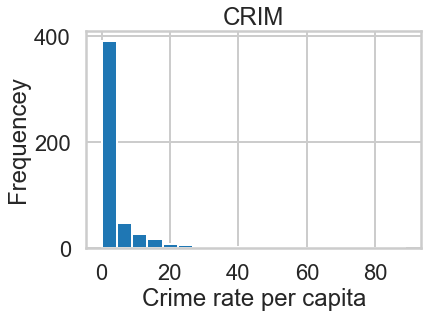

In [38]:
plt.hist(bos.CRIM, bins=20)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

In [ ]:
# By plotting the raw, untransformed data, even with 20 bins, we see there is an
# expontneial drop off in frequency. The frequency of the biggest bin is nearly
# an order of magnitude larger than the next biggest. And that bin in turb
# is probably an order of magnitude bigger than those two tiny bins
# around 20-30. When data is occurs across this sort of orders-of-magnitiude scale
# applying a logarithm 'undoes' this drastic differences and helps reveal more
# nuance and detail that will otherwise be hidden.
# The untransformed graph makes it appear as though nearly all the towns represented in
# the data set have very low crime rates, near 0. The second 'hump' in the
# the transformed histogram tells a somewhat different story: A fair number
# of towns have crime rates a good 50-100 [exp(4) to exp(5)] times higher than the large 
# subset represented in the biggest bar.

Text(0.5, 1.0, 'Relationship between RM and PTRATIO')

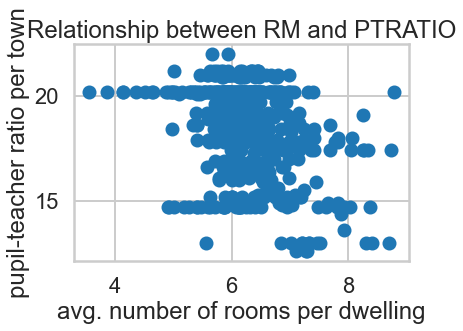

In [48]:
#The instructions to plot histograms for RM and PTRATIO 'against each other'
# is confusing. You cannot pick up on correlations between independent variables
# by looking at histograms since they could be on totally different
# scales; that's what scatter plots are for, with two independent axes to plot
# two variables against each other!
plt.scatter(bos.RM, bos.PTRATIO)
plt.xlabel("avg. number of rooms per dwelling")
plt.ylabel("pupil-teacher ratio per town")
plt.title("Relationship between RM and PTRATIO")

Text(0.5, 1.0, 'Relationship between AGE and ZN')

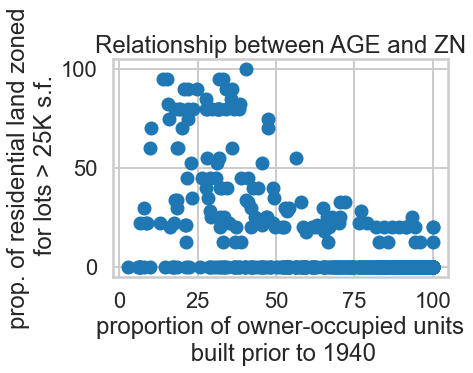

In [52]:
# AGE: proportion of owner-occupied units built prior to 1940
# ZN: proportion of residential land zoned for lots over 25,000 sq.ft
plt.scatter(bos.AGE, bos.ZN)
plt.xlabel("proportion of owner-occupied units\n built prior to 1940")
plt.ylabel("prop. of residential land zoned\n for lots > 25K s.f.")
plt.title("Relationship between AGE and ZN")

In [59]:
# At first glance we might conclude there is some correlation in the above plot,
# specifically a negative trend. And there probably is: if a town has proportionally 
# fewer older dewllings - i.e. most were built after WWII - then there are more likely
# to be a larger percentage of big lots, a result of the broadly shared post-war
# middle class prosperity America experienced during at least the first two post-war
# generations. 
# However, that entire subset of data along the bottom, in which every lot in the town
# is under 25k s.f., does mess with the overall correlation. Indeed, the majority of the entire
# 506 data points sits on that line - probably 60-70%. 
# This chunk of data on the flat line pretty well messes up the correlation.

Text(0.5, 1.0, 'Relationship between RM and AGE')

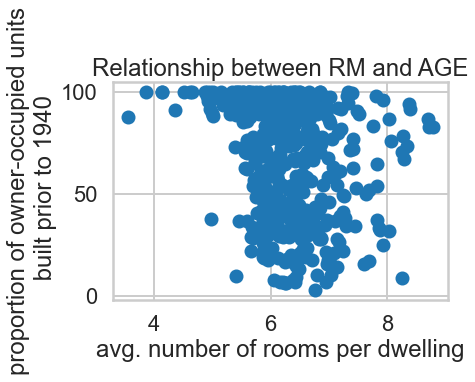

In [53]:
plt.scatter(bos.RM, bos.AGE)
plt.xlabel("avg. number of rooms per dwelling")
plt.ylabel("proportion of owner-occupied units\n built prior to 1940")
plt.title("Relationship between RM and AGE")

Text(0.5, 1.0, 'Relationship between RM and ZN')

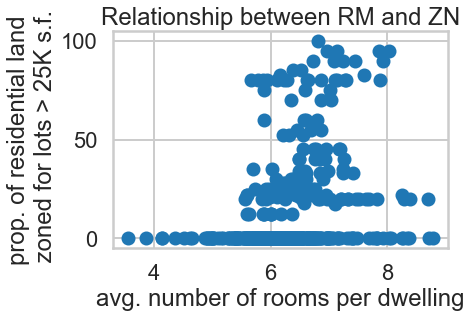

In [58]:
plt.scatter(bos.RM, bos.ZN)
plt.xlabel("avg. number of rooms per dwelling")
plt.ylabel("prop. of residential land\n zoned for lots > 25K s.f.")
plt.title("Relationship between RM and ZN")

Text(0.5, 1.0, 'Relationship between PTRATIO and AGE')

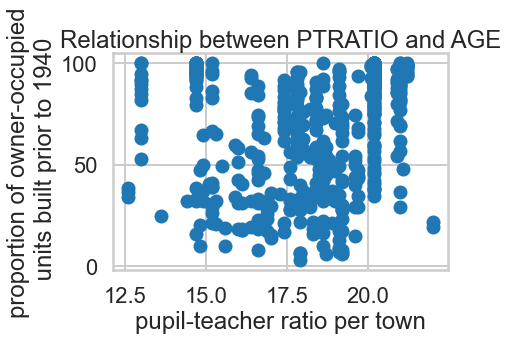

In [57]:
#PTRATIO v. AGE
plt.scatter(bos.PTRATIO, bos.AGE)
plt.xlabel("pupil-teacher ratio per town")
plt.ylabel("proportion of owner-occupied\n units built prior to 1940")
plt.title("Relationship between PTRATIO and AGE")

Text(0.5, 1.0, 'Relationship between PTRATIO and ZN')

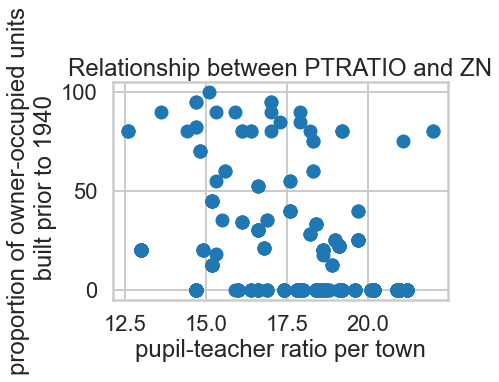

In [56]:
#PTRATIO v. ZN
plt.scatter(bos.PTRATIO, bos.ZN)
plt.xlabel("pupil-teacher ratio per town")
plt.ylabel("proportion of owner-occupied units\n built prior to 1940")
plt.title("Relationship between PTRATIO and ZN")

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [60]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [88]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())
print(m.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           2.49e-74
Time:                        16:07:25   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is done like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Text(0.5, 1.0, 'Relationship between Predicted and Actual Price')

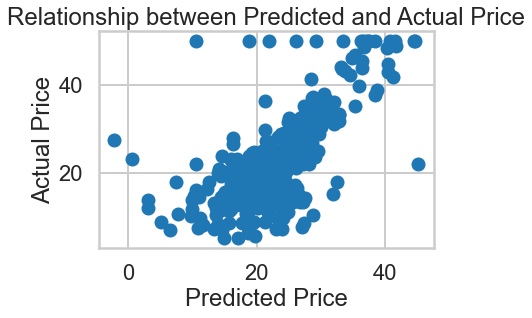

In [64]:
# Fitted prices v PRICE
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Relationship between Predicted and Actual Price")

In [66]:
# There is a good size mass of data in the lower right that overpredicts the price: 
# predicted price is 20-30 versus actual price under 20. At the top end we see 
# the so-called ceiling on price with a chunk of data where the actual price 
# is above 40-50 but the predicted price is between 10 and 40 - underpredictions.
#
# There are also some interesting outliers. One is the datum at the far right with a predicted price
# nearly 2.5x the actual price. At the left end, we see two more oddballs. One is a 
# predicted price of near 0 versus the actual price above 20. The even odder outlier is the unit
# with a negative predicted price (please, I'll pay you to take my house!), versus an actual
# price of nearly 30. But that's how it goes with regression models. You have to be on the look out
# for nonesense predictions, especially with a model that only has R^2 = 0.48. That's a lot of
# variance the linear model simply cannot explain.

### Fitting Linear Regression using `sklearn`


In [67]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [ ]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [68]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression()

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [69]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### To force the intercept through the origin, we create do the following:

lm = LinearRegression(fit_intercept=False)

### The intercept (aka the bias or offset) is the predicted value when the predictors are set to 0. Setting some of the Boston housing dataset to 0 does not even make sense. RM = 0? Nonsense! DIS = 0? Nonsense! TAX = 0? Nonsense! That we cannot plausibly set multiple predictors to 0 suggests the intercept itself is not meaningful in this model. Forcing it to 0 wil not make it meaningful. Moreover, it will possibly tilt the line if the intercept is far from the origin initially. There is no compelling reason to mess with the intercept of this model.

### Though residuals are assumed to be statistically independent, that is frequently a much stronger condition than is needed in practice. Typically, it is enough that they be uncorrelated. So we may rephrase this as follows: Is it acceptable for the residuals to be correlated if they are also normally distributed? The answer is: No, not for OLS, which is the method used here. Under the right circumstances, other methods such as Generalized Least Squares and more generally Bayesian Linear Regression could be applied against normally distributed, correlated errors. (see https://en.wikipedia.org/wiki/Linear_regression#Assumptions)

### The only assumption made about the response variable $Y$ is that it is a linear combination of the predictor variables $x_i$, i.e. $Y = X \beta + \epsilon$. There is no assumption that $Y$ has any particular distribution.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [71]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.459488385089806


In [72]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [73]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [74]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

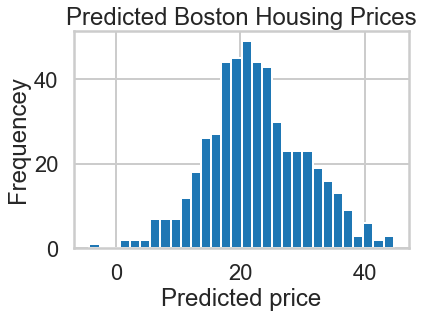

In [76]:
plt.hist(lm.predict(X), bins=30)
plt.title("Predicted Boston Housing Prices")
plt.xlabel("Predicted price")
plt.ylabel("Frequencey")
plt.show()

### We see that much of the housing price predictions hover right around the middle of the range. It looks fairly symmetric though the prices tend to skew a bit right. It's no so easy to see the outliers from thsi histogram - other than the one obvious unit with a negative predicted price. But as we saw in the scatter plot above, with actual price versus predicted, there are indeed some outliers. There was one obvious overprediction at the far right. Perhaps this house has lots of rooms but they are small rooms in a smallish house. Or maybe the house is run down and in need of significant maintenance. There are also more than a few big under-predictions. A couple are at the far left of the scatter plot, with prices predicted near or even less than 0 while the actual price is above 20. Perhaps these are unit with some sort of open/studio type floor plan that has very few distinct rooms in the traditional sense but are still nice, roomy homes. There are also the outliers up top with high values, around 50, but with predicted prices between 10 and 40. Those could also be of the open floor plan variety but more upscale, richly appointed dwellings, possibly in coveted neighborhoods. 

Text(0.5, 1.0, 'Relationship between Predicted and Actual Price')

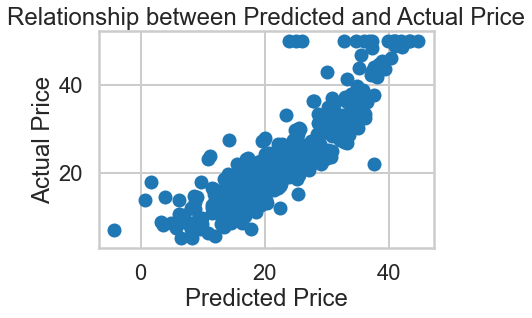

In [77]:
# Fitted prices v PRICE
plt.scatter(lm.predict(X), bos.PRICE)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Relationship between Predicted and Actual Price")

### The big difference between the statsmodels and scikit-learn package is really in focus of each package when doing OLS regression. Statsmodels is foucsed in providing the wealth of extra info a statistician expects to see to carry out hypothesis testing, statistical significance, effect size, and other inferential statistics. They might want to know things like p-values, t-scores, confidence intervals and perhaps more esoteric details. Scikit-learn is focused on the ML side of the equation. With an OLS scikit-learn model in hand, you can easily do cross-validation. Statsmodels might be a good place to gain a deeper statistical understanding of your model while scikit-learn is a more natural choice for training, validating and testing your model.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [78]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [79]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE))**2))

31637.51083706472


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSR = \frac{ESS}{K}$$

$$MSE = \frac{RSS}{N-K-1}$$

**Remember:** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [82]:
# your turn
lm = LinearRegression()
lm.fit(np.array(bos.PTRATIO).reshape(-1,1), bos.PRICE)

LinearRegression()

In [83]:
print(f'Estimated intercept coefficient: {lm.intercept_}')

Estimated intercept coefficient: 62.34462747483268


In [85]:
print(f'Coefficient: {lm.coef_[0]}')

Coefficients: -2.157175296060966


### Interpretation: If the pupil-teacher ratio is 0 the predicted price is $\approx 62,300$. For each increase in the pupil-teacher ratio of 1, the predicted price drops by $\approx 2,160$.

In [87]:
r2 = lm.score(np.array(bos.PTRATIO).reshape(-1,1), bos.PRICE)
print(f'R^2 = {r2}')

R^2 = 0.257847318009223



### This value of $R^2$ means that about 25% of the variability of housing prices in the dataset are explained by this linear model. Pupil-teacher ratio is not a very strong predictor of housing price. Other variables are needed to more fully explain the variance.

In [157]:
from scipy.stats import f

N = len(bos.PRICE)
K = 1
F = r2/(1 - r2)*(N - K - 1)/(K)
print(f'F = {F}')
dfd = N - K - 1
dfn = K
f_sf = f.sf(F, dfn, dfd)
print(f'{f_sf}')

F = 175.10554287569548
1.6095094784729786e-34


In [109]:
m2 = ols('PRICE ~ PTRATIO',bos).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.61e-34
Time:                        16:28:34   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

### The manual calculation of the F statistic and corresponding p-value (via scipy f.sf(), the survival function) agrees with the values shown in the statsmodel summary of OLS regression run on Price v. PTRATIO. The p-value is vanishingly small. We reject $H_0$ in favor of $H_a$ at any reasonable level of significance and conclude the model is indeed statistically significant. 

### Note that the relationship between $t$ and $F$ is: $t^2 = F$.

In [169]:
t = -13.233
print(f't^2: {t**2} \n F: {F} \n They are approximately equal (due to rounding error on t)')

t^2: 175.112289 
 F: 175.10554287569548 
 They are approximately equal (due to rounding error on t)


<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [120]:
m3 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           6.15e-98
Time:                        17:03:57   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

In [139]:
r = m3.summary().tables[0].as_html()
df = pd.read_html(r, header=0, index_col=0)[0]
df

,PRICE,R-squared:,0.594
Dep. Variable:,,,
Model:,OLS,Adj. R-squared:,5.920000e-01
Method:,Least Squares,F-statistic:,2.452000e+02
Date:,"Fri, 03 Dec 2021",Prob (F-statistic):,6.150000e-98
Time:,17:28:08,Log-Likelihood:,-1.612000e+03
No. Observations:,506,AIC:,3.232000e+03
Df Residuals:,502,BIC:,3.249000e+03
Df Model:,3,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


In [143]:
F = df.iloc[1,2]
F_p_value = df.iloc[2,2]
print(f' F:\n{F} \n p-value:\n{F_p_value}')

 F:
245.2 
 p-value:
6.15e-98


### Once again, this is a very small p-value so we reject $H_0$ in favor of $H_a$ and conclude the model is statistically significant.

In [145]:
R2 = df.iloc[0,2]
print(f' R^2:\n{R2}')

 R^2:
0.592


### This model explains about 59% of the variability in the housing prices, much better than just PTRATIO alone!

### Based on the table above, all three predictors are significant (at the $\alpha = 0.0005$ level, at least) in predicting housing prices. 

### With the CRIM coefficient $\approx -0.205$ we can see that for every 5 unit increase in the per capita crime rate, the housing price is predicted to drop about 1,000. On the other hand, for each additional room, the house price is expected to rise about 7,380. And for each additional student per teacher in the classroom, the house price is likely to fall about 1,070. More crime? Lower prices. More students? Lower prices. More rooms? Higher prices!

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

### Let's add TAX (full-value property-tax rate per 10,000) to the model from part 3. 

In [146]:
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + TAX',bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     191.6
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           1.67e-99
Time:                        19:54:20   Log-Likelihood:                -1605.5
No. Observations:                 506   AIC:                             3221.
Df Residuals:                     501   BIC:                             3242.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7828      3.989     -0.698      0.4

### Well, that's interesting! The new variable only explains about 1% more variability in the price but suddenly the condition number jumps way up, suggesting multicollinearity. Chances are TAX and RM are strongly correlated! Ok, back to the drawing board. Let's pick another variable, B ( = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town).

In [147]:
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + B',bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     203.0
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          2.39e-103
Time:                        19:58:39   Log-Likelihood:                -1596.5
No. Observations:                 506   AIC:                             3203.
Df Residuals:                     501   BIC:                             3224.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1384      4.097     -2.475      0.0

### OK, same problem again. Maybe not B after all. How about INDUS (proportion of non-retail business acres per town)?

In [151]:
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + INDUS',bos).fit()
print(m4.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     192.2
Date:                Fri, 03 Dec 2021   Prob (F-statistic):          9.97e-100
Time:                        20:01:32   Log-Likelihood:                -1604.9
No. Observations:                 506   AIC:                             3220.
Df Residuals:                     501   BIC:                             3241.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0649      4.029     -0.264      0.7

### So to be clear, the full model is the one just built, with 4 predictors, and the model from part 3 is the reduced model with 3 of the 4 predictors. We can start with AIC comparison: 3232 for the reduced model; 3220 for the fuller model. This suggests the later is a better fitting model.

### We'll now calculate the F statistic for nested models:

In [156]:
rss_reduced = m3.ssr
rss_full = m4.ssr
df_reduced = len(bos.PRICE) - 4
df_full = len(bos.PRICE) - 5
F = ((rss_reduced - rss_full)/(df_reduced - df_full))/(rss_full/df_full)
F

14.145706886729748

In [158]:
dfn = df_reduced - df_full
dfd = df_full
p_value = f.sf(F, dfn, dfd)
print(f'\n The F statistic for nested models is:\n{F}')
print(f'\n The df are:\n df numerator: {dfn} \n df denominator: {dfd}')
print(f'\n The p_value is:\n{p_value}')


 The F statistic for nested models is:
175.10554287569548

 The df are:
 df numerator: 1 
 df denominator: 501

 The p_value is:
1.711766286641023e-34


### $$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### The above p-value is extremely small which implies we reject $H_0$. But what is the $H_0$? In this case $H_0$ states that the reduced model is correct - one or more parameters in the full model are 0. (see http://people.reed.edu/~jones/Courses/P24.pdf). We reject $H_0$ and thus conclude there is statistically significant evidence that the full model better explains the data. 


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [159]:
dir(m3)


['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

Text(0.5, 1.0, 'Residuals v. Fitted Values \n PRICE ~ RM + PTRATIO + CRIM')

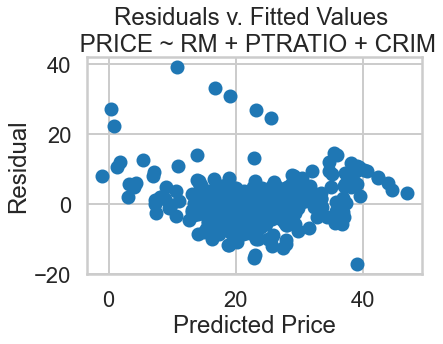

In [163]:
#Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?
plt.scatter(m3.fittedvalues, m3.resid)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residuals v. Fitted Values \n PRICE ~ RM + PTRATIO + CRIM")

### The residuals are supposed to be normally distributed. The really obvious departure is seen with the negatively sloping line of points from upper left down toward the far right. These correspond to the ceiling on actual prices we saw in the scatter plot of actual versus predicted prices above. There were a number of points that had actual prices around 50k, and this was an apparent ceiling on price. But the under-predicted prices ranged from 10-40k. Granted this is only about 4-5% of the entire dataset. But it is a clear departure from the random noise around 0 we should see for residuals. We might also conclude there is an overall 'curviness' to the plot at the extremes. For the lowest predicted prices, roughly under 5000, all the residuals are positive, i.e these are all under-predictions. At the other end, there are another set of under-predictions for the very highest predicted prices. So the model seems to have issues making good predictions at the extremes. 

C:\Users\david\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


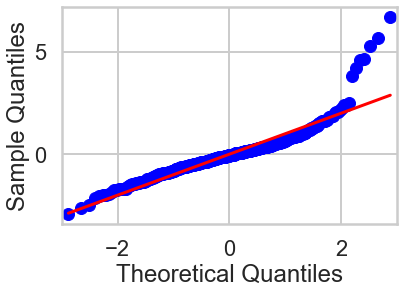

In [168]:
#Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
fig = sm.qqplot(m3.resid, line="s", fit=True)
plt.show()

### The obvious significant departure from normality here occurs with the last bit of residuals sitting well above the fit line. This suggests a heavier right tail for the distribution of residuals, i.e. an excess of extreme under-predictions in which the actual price exceeds the predicted. (see https://data.library.virginia.edu/understanding-q-q-plots/) This probably corresponds to the line of high prices we've seen before across the top of the scatter plot of actual v. predicted prices.

### Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other? An advantage of the residuals versus predicted price is that if the residuals don't randomly bounce around the 0 line, we can easily identify such patterns and the predicted values tied to them. We can quickly assess the reasonableness of the linearity assumption that underlies our use of OLS in the first place. We can also pick up on particular outliers. A possible disadvantage of this type of plot is the subjective nature of making assessments such as whether the residuals really do bounce randomly around the 0 line. With over 500 residuals in the above plot, it's simply too much information for our mind to process reliably. Our judgement is more of a gut level feeling. An advantage of the q-q plot is that all the residuals are lined up from smallest to largest, so there is some order imposed on them. That makes it easy to see when the actual quantiles begin to seriously deviate from the expected quantiles. Things like skewness and heavy tails in the residuals are easier to pick up on. A disadvantage is the q-q plot is that the underlying data (predicted price) is absent - we don't know for sure which predicted price a given residual matches with in general. At least not without looking side by side at another plot, such as a scatter of actual versus predicted prices.

### Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent. The two dwellings at the far left of the residual v. fits plot are under-predictions by 20000-25000. The biggest contribution to a predicted price is the number of rooms. Perhaps these homes are unusual designs with fewer rooms than a typical unit but they still have a lot of space, i.e. an open floor plan. Or maybe they sit on a larger plot of land, with lots of privacy and a lovely view of the Charles River. All of these might contribute to a higher actual price and cause the model to under-predict. There is also that string of outlier houses in the upper middle, which are under-predictions as well. These all come from that horizontal line of top-end houses in the scatter plot of actual v. predicted prices. Perhaps these houses as well have unusual floor plans. Maybe these house were designed by a famous architect, Frank Lloyd Wright for instance. Maybe these houses sit on extra big lots near the Charles, or near some undeveloped open space, near a forest. All of this could contribute to the very high actual prices that are substantially under-predicted by the 3-variable model.

### Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

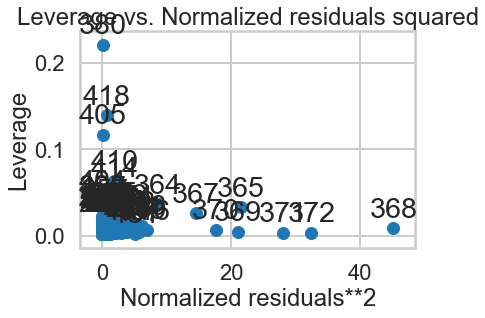

<Figure size 1080x1080 with 0 Axes>

In [184]:
sm.graphics.plot_leverage_resid2(m3)
plt.figure(figsize=(15, 15))
plt.show()

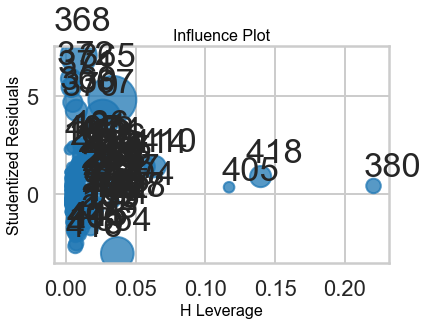

<Figure size 1080x1080 with 0 Axes>

In [183]:
sm.graphics.influence_plot(m3)
plt.figure(figsize=(15, 15))
plt.show()

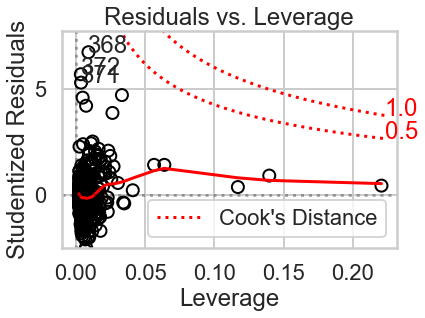

<Figure size 1080x1080 with 0 Axes>

In [182]:
#Borrowed from https://towardsdatascience.com/going-from-r-to-python-linear-regression-diagnostic-plots-144d1c4aa5a

import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np
import scipy.stats as stats

results = m3
student_residuals = pd.Series(results.get_influence().resid_studentized_internal)
student_residuals.index = results.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = results.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
#plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(results.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.figure(figsize=(15, 15))
plt.show()

### Note than none of the points lie beyond the Cook's distance lines thus none of them are considered leverage points. Removing even the three annotated points in the upper left will not significantly change the model coefficients nor the value of $R^2$.

### Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

In [201]:
res_gt_20 = m3.resid[m3.resid > 20]
res_gt_20

365    27.127667
367    22.336529
368    39.298836
369    26.814372
370    24.534761
371    30.991160
372    33.310083
dtype: float64

In [211]:
# None < -20
res_lt_20 = m3.resid[m3.resid < -20]
res_lt_20

Series([], dtype: float64)

In [212]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [213]:
#Drop points with residuals > 20
res_lt_20 = [x for x in bos.index if x not in res_gt_20.index]
reduced_bos = bos.iloc[res_lt_20]
reduced_bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [214]:
m3_reduced = ols('PRICE ~ CRIM + RM + PTRATIO',reduced_bos).fit()
print(m3_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     421.5
Date:                Sat, 04 Dec 2021   Prob (F-statistic):          7.11e-136
Time:                        19:08:52   Log-Likelihood:                -1478.3
No. Observations:                 499   AIC:                             2965.
Df Residuals:                     495   BIC:                             2982.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2283      3.291     -1.893      0.0

In [215]:
#Compare with m3 summary:
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           6.15e-98
Time:                        19:09:22   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

### We now see a substantial jump in $R^2$, from under 60% to nearly 72%. The p-value for the F-statistic is still highly significant. 

Text(0.5, 1.0, 'Residuals v. Fitted Values \n PRICE ~ RM + PTRATIO + CRIM \n(Removed High Residual Points)')

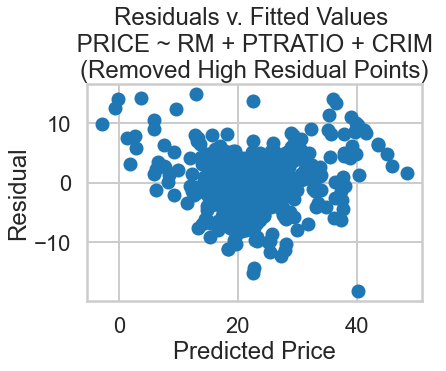

In [217]:
plt.scatter(m3_reduced.fittedvalues, m3_reduced.resid)
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.title("Residuals v. Fitted Values \n PRICE ~ RM + PTRATIO + CRIM \n(Removed High Residual Points)")

### Better! A more convincing residual v. fits plot!